<a href="https://colab.research.google.com/github/khairihilmi01/data_science_latihan/blob/main/Clustering/Clustering_KMeans_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Library**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for plot data
import matplotlib.pyplot as plt
sns.set_style('white')

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv', index_col=0)

In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
# Age, annual income and spending score mean based on sex
df.groupby('Genre').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
# Annual Income mean based on sex
df.groupby('Genre').mean()['Annual Income (k$)']

Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

## **Data Cleaning**

In [ ]:
# View missing value
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Change column name to make them look more organized (depending on what you want)
df.rename(columns= {'Annual Income (k$)':'Annual Income (k$)'.strip(' (k$)'),
                    'Spending Score (1-100)':'Spending Score (1-100)'.strip(' (1-100)')}, inplace=True)

# **Exploratory Data Analysis**

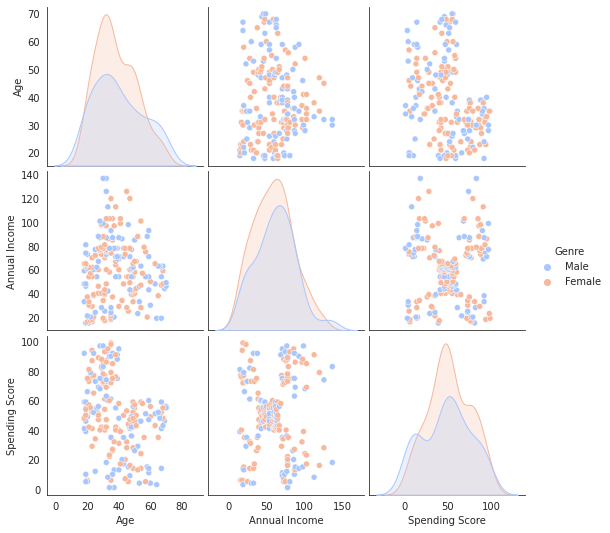

In [ ]:
# distribution of data based on features
sns.pairplot(df, palette='coolwarm', hue='Genre')

In [ ]:
# Customer based Sex
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Customer based Sex with Pieplot')]

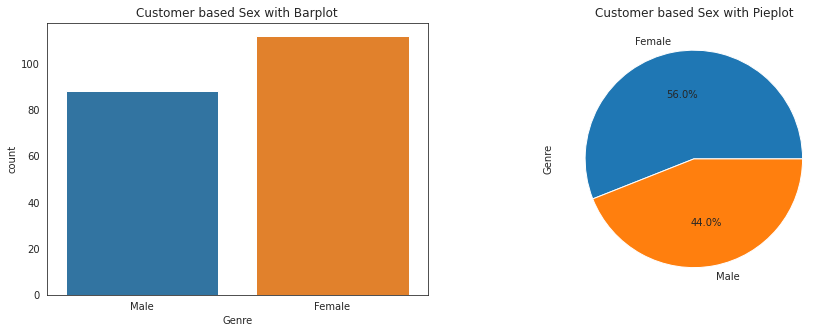

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot('Genre', data=df, ax=ax[0]).set(title='Customer based Sex with Barplot')
df.Genre.value_counts().plot.pie(autopct="%.1f%%",ax= ax[1]).set(title='Customer based Sex with Pieplot')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


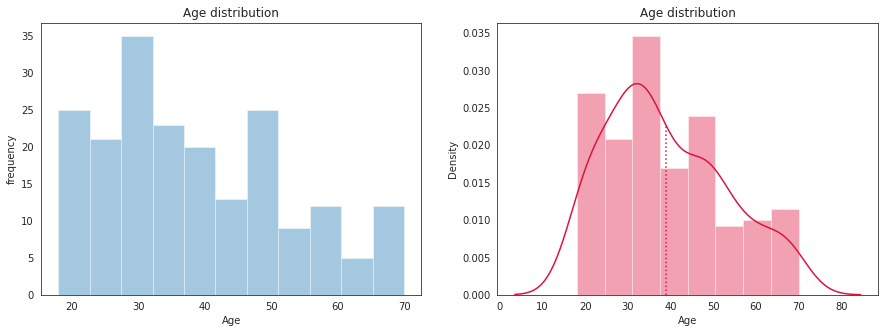

In [ ]:
# Visualization of age distribution
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['Age'].values, bins=11, 
             kde=False, 
             axlabel='Age',
             ax=ax[0]).set(title='Age distribution',ylabel='frequency')

x = df['Age'].values
axs = sns.distplot(x, color='crimson',ax=ax[1])
kdeline = axs.lines[0]
mean = x.mean()
height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
axs.vlines(mean, 0, height, color='crimson', ls=':')
axs.set_ylim(ymin=0)
plt.xlabel('Age')
plt.title('Age distribution')
plt.show()

In [ ]:
df['Age'].values.mean()

38.85

We can conclude from distribution that most customers age are in their 30s.
The average age of all customers is 38.85.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


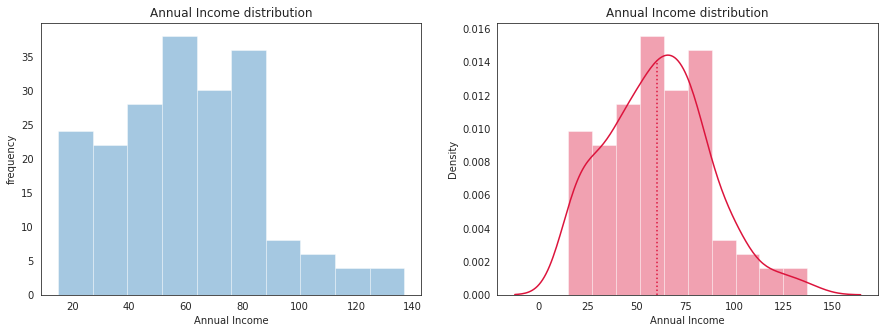

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Annual Income'].values, kde=False, axlabel='Annual Income', ax=ax[0]).set(title='Annual Income distribution',ylabel='frequency')

x = df['Annual Income'].values
axs = sns.distplot(x, color='crimson',ax=ax[1])
kdeline = axs.lines[0]
mean = x.mean()
height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
axs.vlines(mean, 0, height, color='crimson', ls=':')
axs.set_ylim(ymin=0)
plt.xlabel('Annual Income')
plt.title('Annual Income distribution')
plt.show()

In [ ]:
df['Annual Income'].values.mean()

60.56

most customer have their annual income between 60 and 80 <br>
and The average Annual Income of all customers is 60.56.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


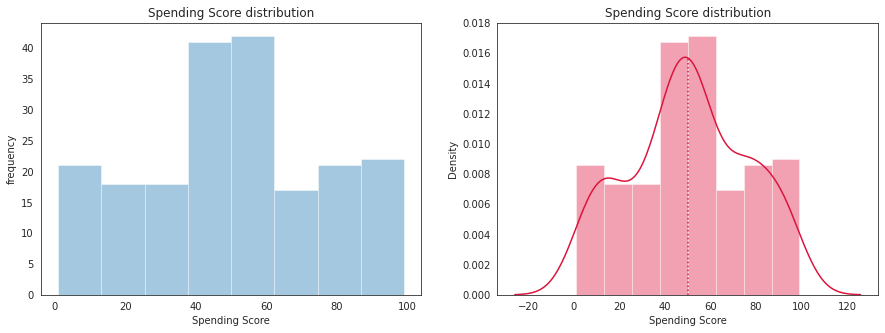

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Spending Score'].values, 
             kde=False, 
             axlabel='Spending Score', 
             ax=ax[0]).set(title='Spending Score distribution',ylabel='frequency')

x = df['Spending Score'].values
axs = sns.distplot(x, color='crimson',ax=ax[1])
kdeline = axs.lines[0]
mean = x.mean()
height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
axs.vlines(mean, 0, height, color='crimson', ls=':')
axs.set_ylim(ymin=0)
plt.xlabel('Spending Score')
plt.title('Spending Score distribution')
plt.show()

In [ ]:
df['Spending Score'].values.mean()

50.2

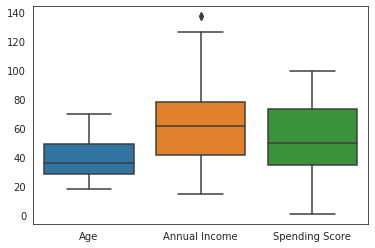

In [ ]:
# Boxplot of data based on features except Genre/Sex
sns.boxplot(data = df)

## **Modelling**

In [ ]:
# select the required features
data = df.drop(['Age','Genre'],1)
data.head()

,Annual Income,Spending Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [ ]:
# import library for clustering
from sklearn.cluster import KMeans

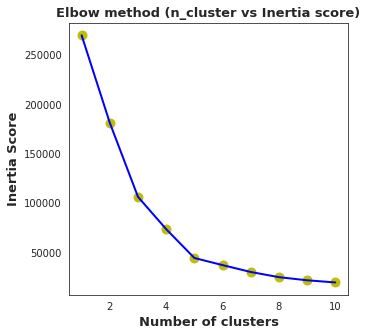

In [ ]:
# Make loop for store the score of our model
InertiaScore = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data)
    InertiaScore.append(kmeans.inertia_)
plt.figure(figsize=(5,5))
plt.scatter(range(1, 11),InertiaScore,c='y',s=80)
plt.plot(range(1, 11),InertiaScore,c='b',linewidth=2)
plt.title('Elbow method (n_cluster vs Inertia score)',fontweight='bold',fontsize=13)
plt.xlabel('Number of clusters',fontweight='bold', fontsize=13)
plt.ylabel('Inertia Score',fontweight='bold',fontsize=13)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# array of centroid
centroid = kmeans.cluster_centers_

In [ ]:
# create new column for cluster in df
df['Cluster'] = kmeans.labels_

In [ ]:
df

,Genre,Age,Annual Income,Spending Score,Cluster
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,4
3,Female,20,16,6,3
4,Female,23,16,77,4
5,Female,31,17,40,3
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,1
198,Male,32,126,74,2


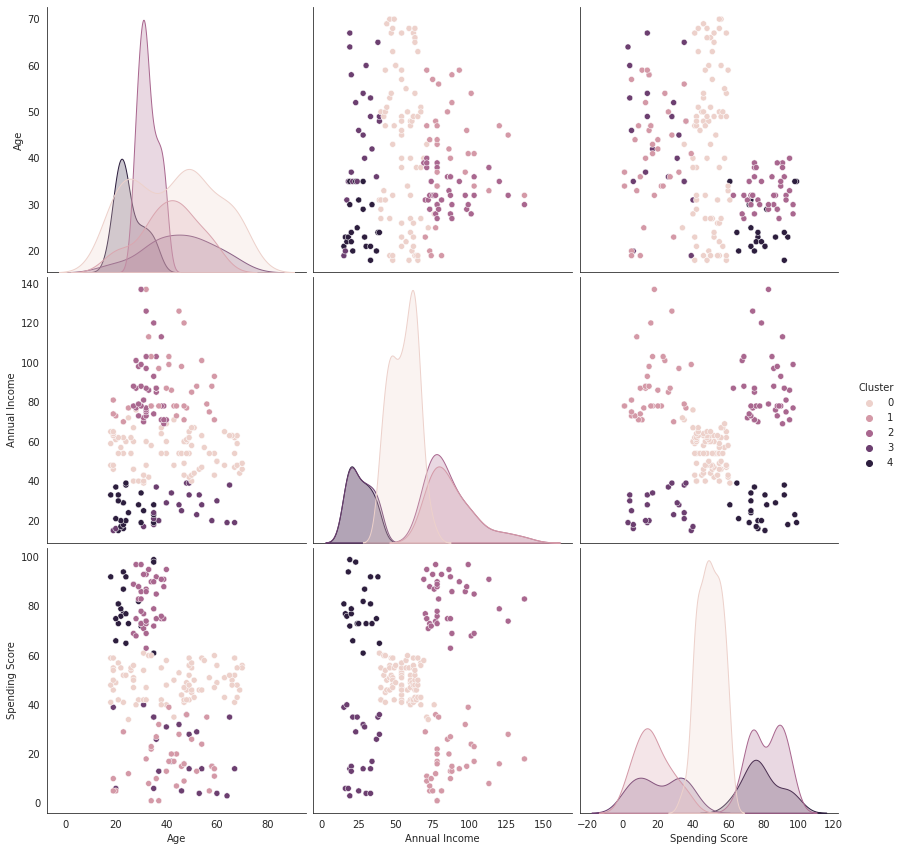

In [ ]:
# distribution of data and cluster
sns.pairplot(df, hue='Cluster', height=4)

In [ ]:
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

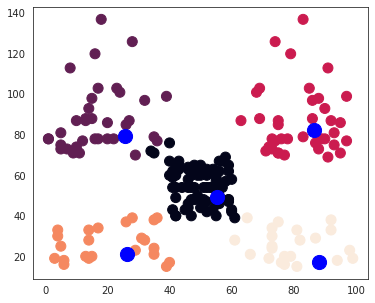

In [ ]:
# plot of Spending Score vs Annual Income 
plt.figure(figsize=(6,5))
plt.scatter('Spending Score', 'Annual Income', data=df, c=[kmeans.labels_], s=100)
plt.scatter(centroid[:,0],centroid[:,1], c ='b', s=200)